In [1]:
# Standard 
import os, sys , copy ,shutil, logging, csv, json, logging
logger = logging.getLogger()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize

# Import all the streamm modules
from streamm import *

%load_ext autoreload
%autoreload 2

In [2]:
local = resource.Resource('local')
local.load_json()

peregrine = resource.Resource('peregrine')
peregrine.load_json()

Reading in resource json file res_local.json 
Reading in resource json file res_peregrine.json 


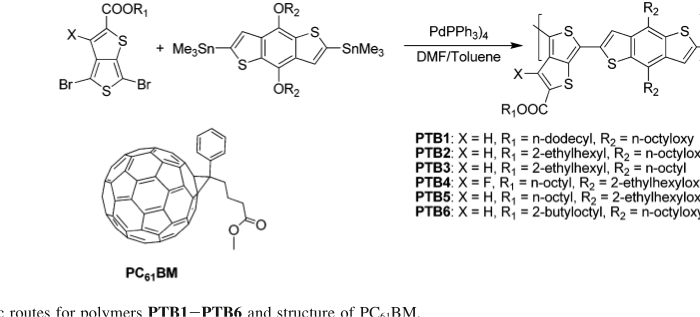

In [3]:
from IPython.display import Image
Image(filename=local.dir['home']+'/figures/PTBX.png')

In [4]:
os.chdir('/Users/tkemper/Projects/DApolymers/notebooks')

In [5]:
os.getcwd()

'/Users/tkemper/Projects/DApolymers/notebooks'

for tag_i in tag_list:
    calc_i  = calculation.CalculationRes(tag_i)
    proj_i.calculations[tag_i] = calc_i

In [6]:
proj_tag = 'res_et2'
proj_i = project.Project('DAPpolymers_%s'%(proj_tag))
proj_i.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [7]:
name_l = []
name_l.append('BDT-TPD')
name_l.append('PTB1')
name_l.append('PTB5')
name_l.append('PTB4')
name_l.append('PTB7')
name_l.append('PCE10')

In [8]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.dir['materials'] = '/Users/tkemper/Projects/DApolymers/materials/'+calc_i.properties['name']
    print calc_i.properties['struc_tag'] ,calc_i.properties['name'],calc_i.dir['materials']
 

D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193 PTB7 /Users/tkemper/Projects/DApolymers/materials/PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193 PTB4 /Users/tkemper/Projects/DApolymers/materials/PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193 PTB5 /Users/tkemper/Projects/DApolymers/materials/PTB5
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173 PCE10 /Users/tkemper/Projects/DApolymers/materials/PCE10
D1_R2R200_A2_R3_R200R200R201_n5_x197 BDT-TPD /Users/tkemper/Projects/DApolymers/materials/BDT-TPD
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193 PTB4 /Users/tkemper/Projects/DApolymers/materials/PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193 PTB7 /Users/tkemper/Projects/DApolymers/materials/PTB7
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173 PTB1 /Users/tkemper/Projects/DApolymers/materials/PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173 PCE10 /Users/tkemper/Projects/DApolymers/materials/PCE10
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173 PCE10 /Users/tkem

In [9]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print calc_i.tag,calc_i.properties['name'],calc_i.meta['status']



D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB7 finished
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4 finished
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5 finished
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3 PCE10 ready
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD finished
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB4 finished
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7 finished
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1 finished
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10 finished
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2 PCE10 finished


In [10]:
def load_etij(calc_i):
    # 
    os.chdir(calc_i.dir['materials'])

    calc_i.et_ij = pd.read_csv("%s.csv"%calc_i.tag)

    print " len_o ",len(calc_i.et_ij)

    etdr = calc_i.et_ij.replace([np.inf, -np.inf], np.nan)
    calc_i.et_ij = etdr.dropna() #subset=['Vij','Vji'],how="all")

    print  " len after dropna ",len(calc_i.et_ij)

    calc_i.et_ij['absSij'] = calc_i.et_ij['Sij'].abs()

    #print calc_i.et_ij.columns

    et_ij3 = calc_i.et_ij[calc_i.et_ij['absSij'] > 1.e-6  ]
    calc_i.et_ij_s = et_ij3


    print  " len after absSij > 1.e-6 ",len(calc_i.et_ij_s)

 
    res_D = [x for x in calc_i.et_ij['resname_i'].values if( x[0] == 'D') ][0]

    res_A = [x for x in calc_i.et_ij['resname_i'].values if( x[0] == 'A') ][0]

    print res_D,res_A

    et_ij3.shape
    

    calc_i.et_DA = et_ij3[ (et_ij3['resname_i'] == res_D) & (et_ij3['resname_j'] == res_A) ]
    calc_i.et_DD = et_ij3[ (et_ij3['resname_i'] == res_D) & (et_ij3['resname_j'] == res_D) ]
    calc_i.et_AA = et_ij3[ (et_ij3['resname_i'] == res_A) & (et_ij3['resname_j'] == res_A) ]        

In [11]:
def linear1(x,linear_coef):
    f_x = linear_coef[0]*x + linear_coef[1]
    return f_x

def residuals_linear(linear_coef, x_list, y_list,y_wt,coef_wt ):
    import math, sys 
    debug = 0
    round_coef = False

    if( len(x_list) != len(y_list) ):
        error_line = "  len(x_list) != len(y_list) in residuals_expo "
        sys.exit(error_line)
        
    if( round_coef ):
        # Round parameters to ~0.01 kca/mol
        for param_i in range( len(linear_coef) ):
            rounded_param = round(linear_coef[param_i] ,8 )
            linear_coef[param_i] = rounded_param 
    resid = []
    for indx in range(len(y_list)):
        n = x_list[indx]
        val_i = y_list[indx]
        fit_i = linear1(n,linear_coef)
        
        delta_val =  fit_i - val_i
        sq_delta = y_wt[indx]*( delta_val*delta_val)
        #sq_delta = float(n*n)*( delta_val*delta_val)
        # print "n,val_i,fit_i",n,val_i,fit_i,sq_delta
        resid.append(sq_delta)
        
    return resid

def fitSV(et_df):
    coef_o = [1,0]
    coef_wt = [1.0]*len(coef_o)
    
    absSij_s = et_df['absSij'].values #apply(lambda x: np.log10(x)) #values
    Vij_s = et_df['Vij'].values #apply(lambda x: np.log10(x)) #values
    Vij_wt = [1]*len(Vij_s)
    
    coef_i,success = optimize.leastsq(residuals_linear,coef_o,args=(absSij_s, Vij_s,Vij_wt,coef_wt ))
    return coef_i

In [12]:
def S_eiejV(Sij,Ei,Ej,linear_coef):
    e_ave = -0.5*(Ei+Ej)
    #e_ave = np.sqrt(Ei*Ej)

    f_x = linear_coef[0]*e_ave*Sij 
    return f_x

def residuals_SeiejV(linear_coef, S_list, Ei_list, Ej_list, V_list,y_wt,coef_wt ):
    import math, sys 
    debug = 0
    round_coef = False

    if( len(S_list) != len(Ei_list) ):
        error_line = "  len(S_list) != len(Ei_list) in residuals_expo "
        sys.exit(error_line)
    if( len(S_list) != len(Ej_list) ):
        error_line = "  len(S_list) != len(Ej_list) in residuals_expo "
        sys.exit(error_line)
    if( len(S_list) != len(V_list) ):
        error_line = "  len(S_list) != len(V_list) in residuals_expo "
        sys.exit(error_line)

        
    if( round_coef ):
        # Round parameters to ~0.01 kca/mol
        for param_i in range( len(linear_coef) ):
            rounded_param = round(linear_coef[param_i] ,8 )
            linear_coef[param_i] = rounded_param 
            
    resid = []
    for indx in range(len(S_list)):
        Sij = S_list[indx]
        Ei = Ei_list[indx]
        Ej = Ej_list[indx]
        Vij = V_list[indx]
        
        fit_i = S_eiejV(Sij,Ei,Ej,linear_coef)
        
        delta_val =  fit_i - Vij
        sq_delta = y_wt[indx]*( delta_val*delta_val)
        #sq_delta = float(n*n)*( delta_val*delta_val)
        # print "n,val_i,fit_i",n,val_i,fit_i,sq_delta
        resid.append(sq_delta)
        
    return resid

def fitSeiejV(et_df):
    coef_o = [1]
    coef_wt = [1.0]*len(coef_o)
    
    absSij_s = et_df['absSij'].values #apply(lambda x: np.log10(x)) #values
    Ei_s = et_df['HOMO_i'].values #apply(lambda x: np.log10(x)) #values
    Ej_s = et_df['HOMO_j'].values #apply(lambda x: np.log10(x)) #values
    Vij_s = et_df['Vij'].values #apply(lambda x: np.log10(x)) #values
    Vij_wt = [1]*len(Vij_s)
    
    coef_i,success = optimize.leastsq(residuals_SeiejV,coef_o,args=(absSij_s,Ei_s,Ej_s,Vij_s,Vij_wt,coef_wt ))
    return coef_i

In [13]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    load_etij(calc_i)



 len_o  112729
 len after dropna  112729
 len after absSij > 1.e-6  11396
D1 A23
 len_o  111367
 len after dropna  111367
 len after absSij > 1.e-6  11688
D1 A23
 len_o  113889
 len after dropna  113889
 len after absSij > 1.e-6  11514
D1 A31
 len_o  200108
 len after dropna  200108
 len after absSij > 1.e-6  10980
D1 A23
 len_o  81173
 len after dropna  81173
 len after absSij > 1.e-6  10570
D1 A2
 len_o  104572
 len after dropna  104572
 len after absSij > 1.e-6  10816
D1 A23
 len_o  110888
 len after dropna  110888
 len after absSij > 1.e-6  11394
D1 A23
 len_o  91030
 len after dropna  91030
 len after absSij > 1.e-6  10034
D1 A31
 len_o  38195
 len after dropna  38195
 len after absSij > 1.e-6  8320
D1 A23
 len_o  202534
 len after dropna  202534
 len after absSij > 1.e-6  10950
D1 A23


In [14]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    #if( calc_i.meta['status'] == 'processed' ):
    print tag_i,calc_i.properties['name'] ,len(calc_i.et_ij),len(calc_i.et_ij_s)

D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB7 112729 11396
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4 111367 11688
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5 113889 11514
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3 PCE10 200108 10980
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD 81173 10570
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB4 104572 10816
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7 110888 11394
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1 91030 10034
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10 38195 8320
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2 PCE10 202534 10950


In [15]:
linear_coef = {}
linear_coef['Polymer'] =[]
linear_coef['pair type'] =[]
linear_coef['slope'] =[]    
linear_coef['y-inter'] =[]        

In [16]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    # if(  calc_i.meta['status'] == 'processed' ):



    coef_DA = fitSV(calc_i.et_DA)
    coef_DD = fitSV(calc_i.et_DD)
    coef_AA = fitSV(calc_i.et_AA)

    linear_coef['Polymer'].append(calc_i.properties['name'])
    linear_coef['pair type'].append('DA')
    linear_coef['slope'].append(coef_DA[0])
    linear_coef['y-inter'].append(coef_DA[1])

    linear_coef['Polymer'].append(calc_i.properties['name'])
    linear_coef['pair type'].append('DD')
    linear_coef['slope'].append(coef_DD[0])
    linear_coef['y-inter'].append(coef_DD[1])

    linear_coef['Polymer'].append(calc_i.properties['name'])
    linear_coef['pair type'].append('AA')
    linear_coef['slope'].append(coef_AA[0])
    linear_coef['y-inter'].append(coef_AA[1])



    print linear_coef

{'slope': [8.5239943612805043, 8.7999427219254596, 9.1304483372050136], 'Polymer': [u'PTB7', u'PTB7', u'PTB7'], 'pair type': ['DA', 'DD', 'AA'], 'y-inter': [0.0023266538786048383, 0.00086789666803028631, 0.0010073118435822784]}
{'slope': [8.5239943612805043, 8.7999427219254596, 9.1304483372050136, 8.6660006174272777, 8.5891160901489254, 8.8720924828499808], 'Polymer': [u'PTB7', u'PTB7', u'PTB7', u'PTB4', u'PTB4', u'PTB4'], 'pair type': ['DA', 'DD', 'AA', 'DA', 'DD', 'AA'], 'y-inter': [0.0023266538786048383, 0.00086789666803028631, 0.0010073118435822784, 0.0018972519908000997, 0.0012167097018198744, 0.0024983567127245996]}
{'slope': [8.5239943612805043, 8.7999427219254596, 9.1304483372050136, 8.6660006174272777, 8.5891160901489254, 8.8720924828499808, 8.5051966125522469, 8.6974746954006505, 8.8315118527082124], 'Polymer': [u'PTB7', u'PTB7', u'PTB7', u'PTB4', u'PTB4', u'PTB4', u'PTB5', u'PTB5', u'PTB5'], 'pair type': ['DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA'], 'y-inter': [0.0

In [17]:
    linear_df = pd.DataFrame(linear_coef)

In [18]:
    print linear_df

    Polymer pair type      slope   y-inter
0      PTB7        DA   8.523994  0.002327
1      PTB7        DD   8.799943  0.000868
2      PTB7        AA   9.130448  0.001007
3      PTB4        DA   8.666001  0.001897
4      PTB4        DD   8.589116  0.001217
5      PTB4        AA   8.872092  0.002498
6      PTB5        DA   8.505197  0.002907
7      PTB5        DD   8.697475  0.000927
8      PTB5        AA   8.831512  0.003482
9     PCE10        DA  10.217124  0.000860
10    PCE10        DD  11.130538  0.000796
11    PCE10        AA   8.545416  0.003725
12  BDT-TPD        DA  10.172224  0.002390
13  BDT-TPD        DD   8.485899  0.001418
14  BDT-TPD        AA  12.962336  0.001616
15     PTB4        DA   8.675911  0.001784
16     PTB4        DD   8.592489  0.001131
17     PTB4        AA   8.894679  0.002456
18     PTB7        DA   8.501762  0.002192
19     PTB7        DD   8.799944  0.000868
20     PTB7        AA   9.048971  0.001502
21     PTB1        DA   8.540003  0.002539
22     PTB1

In [19]:
    os.chdir('/Users/tkemper/Projects/DApolymers/tables/')

    table_lines = ''
    table_lines = 'Polymer & pair type & a & b  \\\\ \hline \n'
    for row in linear_df.values:
        table_lines += '%s & %s & %8.4e & %8.4e \\\\ \n'%(row[0],row[1],row[2],row[3])
    print table_lines
    f = open('linear_fit.tex','w')
    f.write(table_lines)
    f.close()    
    

Polymer & pair type & a & b  \\ \hline 
PTB7 & DA & 8.5240e+00 & 2.3267e-03 \\ 
PTB7 & DD & 8.7999e+00 & 8.6790e-04 \\ 
PTB7 & AA & 9.1304e+00 & 1.0073e-03 \\ 
PTB4 & DA & 8.6660e+00 & 1.8973e-03 \\ 
PTB4 & DD & 8.5891e+00 & 1.2167e-03 \\ 
PTB4 & AA & 8.8721e+00 & 2.4984e-03 \\ 
PTB5 & DA & 8.5052e+00 & 2.9072e-03 \\ 
PTB5 & DD & 8.6975e+00 & 9.2653e-04 \\ 
PTB5 & AA & 8.8315e+00 & 3.4820e-03 \\ 
PCE10 & DA & 1.0217e+01 & 8.6024e-04 \\ 
PCE10 & DD & 1.1131e+01 & 7.9649e-04 \\ 
PCE10 & AA & 8.5454e+00 & 3.7247e-03 \\ 
BDT-TPD & DA & 1.0172e+01 & 2.3897e-03 \\ 
BDT-TPD & DD & 8.4859e+00 & 1.4177e-03 \\ 
BDT-TPD & AA & 1.2962e+01 & 1.6162e-03 \\ 
PTB4 & DA & 8.6759e+00 & 1.7843e-03 \\ 
PTB4 & DD & 8.5925e+00 & 1.1313e-03 \\ 
PTB4 & AA & 8.8947e+00 & 2.4558e-03 \\ 
PTB7 & DA & 8.5018e+00 & 2.1923e-03 \\ 
PTB7 & DD & 8.7999e+00 & 8.6788e-04 \\ 
PTB7 & AA & 9.0490e+00 & 1.5017e-03 \\ 
PTB1 & DA & 8.5400e+00 & 2.5386e-03 \\ 
PTB1 & DD & 8.8171e+00 & 4.6475e-04 \\ 
PTB1 & AA & 8.8755e+00 & 2.6

In [20]:
gamma_coef = {}
gamma_coef['Polymer'] =[]
gamma_coef['pair type'] =[]
gamma_coef['gamma'] =[]    

In [21]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    #if( calc_i.meta['status'] == 'processed' ):

    print calc_i.tag
    print calc_i.properties['name']
    #load_etij(calc_i)

    calc_i.coef_DA = fitSeiejV(calc_i.et_DA)
    calc_i.coef_DD = fitSeiejV(calc_i.et_DD)
    calc_i.coef_AA = fitSeiejV(calc_i.et_AA)        

    gamma_coef['Polymer'].append(calc_i.properties['name'])
    gamma_coef['pair type'].append('DA')
    gamma_coef['gamma'].append(calc_i.coef_DA[0])

    gamma_coef['Polymer'].append(calc_i.properties['name'])
    gamma_coef['pair type'].append('DD')
    gamma_coef['gamma'].append(calc_i.coef_DD[0])


    gamma_coef['Polymer'].append(calc_i.properties['name'])
    gamma_coef['pair type'].append('AA')
    gamma_coef['gamma'].append(calc_i.coef_AA[0])




D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB5
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3
PCE10
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
BDT-TPD
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB7
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4
PCE10
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2
PCE10


In [22]:
print gamma_coef

{'Polymer': [u'PTB7', u'PTB7', u'PTB7', u'PTB4', u'PTB4', u'PTB4', u'PTB5', u'PTB5', u'PTB5', u'PCE10', u'PCE10', u'PCE10', u'BDT-TPD', u'BDT-TPD', u'BDT-TPD', u'PTB4', u'PTB4', u'PTB4', u'PTB7', u'PTB7', u'PTB7', u'PTB1', u'PTB1', u'PTB1', u'PCE10', u'PCE10', u'PCE10', u'PCE10', u'PCE10', u'PCE10'], 'pair type': ['DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA'], 'gamma': [1.1520661778679142, 1.2512871285535587, 1.1293770226235647, 1.1646561527423991, 1.2328564103290041, 1.1180553579480732, 1.1755809652165761, 1.2435475539004814, 1.1551790304426512, 1.376786752921187, 1.6642267889981079, 1.0926154057315189, 1.2418936104298428, 1.2225687062657569, 1.3477399561337384, 1.1631700505601905, 1.2315537909039131, 1.118565068552708, 1.1477335976638727, 1.2512870426964708, 1.1261645224221966, 1.1792789632381042, 1.2489986191737499, 1.1566978433121584, 1.2058243269364

In [23]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.meta['use'] = False
    # print 'proj_i.calculations[\''+calc_i.tag +'\'].meta[\'use\'] = True'

In [24]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print calc_i.tag,calc_i.properties['name']

D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3 PCE10
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2 PCE10


In [25]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2'].meta['use'] = True
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['use'] = True
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2'].meta['use'] = True
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['use'] = True
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['use'] = True
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4'].meta['use'] = True

In [ ]:
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['use'] = True
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['use'] = True
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2'].meta['use'] = True

proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['use'] = True

In [26]:
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

    print  calc_i.tag  ,name_i

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10


In [27]:
et_DDAADA = pd.DataFrame()
for tag_i,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['use'] ):
        print calc_i.tag
        load_etij(calc_i)
        calc_i.et_ij_s['Polymer'] =  calc_i.properties['name']
        print " calc_i.et_ij_s ",len(calc_i.et_ij_s)
        et_DDAADA = pd.concat([et_DDAADA,calc_i.et_ij_s],ignore_index=True)

D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
 len_o  111367
 len after dropna  111367
 len after absSij > 1.e-6  11688
D1 A23
 calc_i.et_ij_s  11688


/Users/tkemper/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
 len_o  113889
 len after dropna  113889
 len after absSij > 1.e-6  11514
D1 A31
 calc_i.et_ij_s  11514
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
 len_o  81173
 len after dropna  81173
 len after absSij > 1.e-6  10570
D1 A2
 calc_i.et_ij_s  10570
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
 len_o  110888
 len after dropna  110888
 len after absSij > 1.e-6  11394
D1 A23
 calc_i.et_ij_s  11394
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
 len_o  91030
 len after dropna  91030
 len after absSij > 1.e-6  10034
D1 A31
 calc_i.et_ij_s  10034
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4
 len_o  38195
 len after dropna  38195
 len after absSij > 1.e-6  8320
D1 A23
 calc_i.et_ij_s  8320


In [28]:
    proj_i.coef_DDAADA = fitSeiejV(et_DDAADA)
    print proj_i.coef_DDAADA

[ 1.17171804]


In [29]:
    gamma_coef['Polymer'].append('all')
    gamma_coef['pair type'].append('DD,AA,DA')
    gamma_coef['gamma'].append(proj_i.coef_DDAADA[0])

In [30]:
    print  gamma_coef

{'Polymer': [u'PTB7', u'PTB7', u'PTB7', u'PTB4', u'PTB4', u'PTB4', u'PTB5', u'PTB5', u'PTB5', u'PCE10', u'PCE10', u'PCE10', u'BDT-TPD', u'BDT-TPD', u'BDT-TPD', u'PTB4', u'PTB4', u'PTB4', u'PTB7', u'PTB7', u'PTB7', u'PTB1', u'PTB1', u'PTB1', u'PCE10', u'PCE10', u'PCE10', u'PCE10', u'PCE10', u'PCE10', 'all'], 'pair type': ['DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DA', 'DD', 'AA', 'DD,AA,DA'], 'gamma': [1.1520661778679142, 1.2512871285535587, 1.1293770226235647, 1.1646561527423991, 1.2328564103290041, 1.1180553579480732, 1.1755809652165761, 1.2435475539004814, 1.1551790304426512, 1.376786752921187, 1.6642267889981079, 1.0926154057315189, 1.2418936104298428, 1.2225687062657569, 1.3477399561337384, 1.1631700505601905, 1.2315537909039131, 1.118565068552708, 1.1477335976638727, 1.2512870426964708, 1.1261645224221966, 1.1792789632381042, 1.2489986191737499, 1.15669784331215

In [31]:
    et_DDAA =  et_DDAADA[ et_DDAADA['resname_i'] == et_DDAADA['resname_j'] ]

In [32]:
    proj_i.coef_DDAA = fitSeiejV(et_DDAA)
    print proj_i.coef_DDAA

[ 1.16762329]


In [33]:
    gamma_coef['Polymer'].append('all')
    gamma_coef['pair type'].append('DD,AA')
    gamma_coef['gamma'].append(proj_i.coef_DDAA[0])

In [34]:
    os.chdir('/Users/tkemper/Projects/DApolymers/materials/')

    gamma_df = pd.DataFrame(gamma_coef)
    linear_df = pd.DataFrame(linear_coef)

    file_name = "gamma_ij.csv"
    gamma_df.to_csv(file_name, sep=',', encoding='utf-8')

    proj_i.files['output']['gamma_ij'] = "gamma_ij.csv"

    file_name = "linear_ij.csv"
    linear_df.to_csv(file_name, sep=',', encoding='utf-8')

    proj_i.files['output']['linear_ij'] = "linear_ij.csv"

In [35]:
    os.chdir('/Users/tkemper/Projects/DApolymers/tables/')

    table_gamma = ''
    table_gamma = 'Polymer & pair type & $\gamma$  \\ \hline \n'
    for row in gamma_df.values:
        table_gamma += '%s & %s & %8.4f \\\\ \n'%(row[0],row[2],row[1])
    print table_gamma
    f = open('gamma.tex','w')
    f.write(table_gamma)
    f.close()    

Polymer & pair type & $\gamma$  \ \hline 
PTB7 & DA &   1.1521 \\ 
PTB7 & DD &   1.2513 \\ 
PTB7 & AA &   1.1294 \\ 
PTB4 & DA &   1.1647 \\ 
PTB4 & DD &   1.2329 \\ 
PTB4 & AA &   1.1181 \\ 
PTB5 & DA &   1.1756 \\ 
PTB5 & DD &   1.2435 \\ 
PTB5 & AA &   1.1552 \\ 
PCE10 & DA &   1.3768 \\ 
PCE10 & DD &   1.6642 \\ 
PCE10 & AA &   1.0926 \\ 
BDT-TPD & DA &   1.2419 \\ 
BDT-TPD & DD &   1.2226 \\ 
BDT-TPD & AA &   1.3477 \\ 
PTB4 & DA &   1.1632 \\ 
PTB4 & DD &   1.2316 \\ 
PTB4 & AA &   1.1186 \\ 
PTB7 & DA &   1.1477 \\ 
PTB7 & DD &   1.2513 \\ 
PTB7 & AA &   1.1262 \\ 
PTB1 & DA &   1.1793 \\ 
PTB1 & DD &   1.2490 \\ 
PTB1 & AA &   1.1567 \\ 
PCE10 & DA &   1.2058 \\ 
PCE10 & DD &   1.3297 \\ 
PCE10 & AA &   1.0926 \\ 
PCE10 & DA &   1.3776 \\ 
PCE10 & DD &   1.6641 \\ 
PCE10 & AA &   1.1061 \\ 
all & DD,AA,DA &   1.1717 \\ 
all & DD,AA &   1.1676 \\ 



In [ ]:
    print 0.5*(-1.1567 + -1.2490)
    print 0.5*(-1.1552 + -1.2435)
    print 0.5*(-1.3477 + -1.2226)    

In [36]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures/')

In [37]:
def calc_S_eiejV(coef_i, S_list, Ei_list, Ej_list):
    Vij_s = []
    for indx in range(len(S_list)):
        Sij = S_list[indx]
        Ei = Ei_list[indx]
        Ej = Ej_list[indx]
        
        Vij_s.append(S_eiejV(Sij,Ei,Ej,coef_i))
    return Vij_s
        

In [38]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['use'] ):
        print calc_i.tag

D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_r

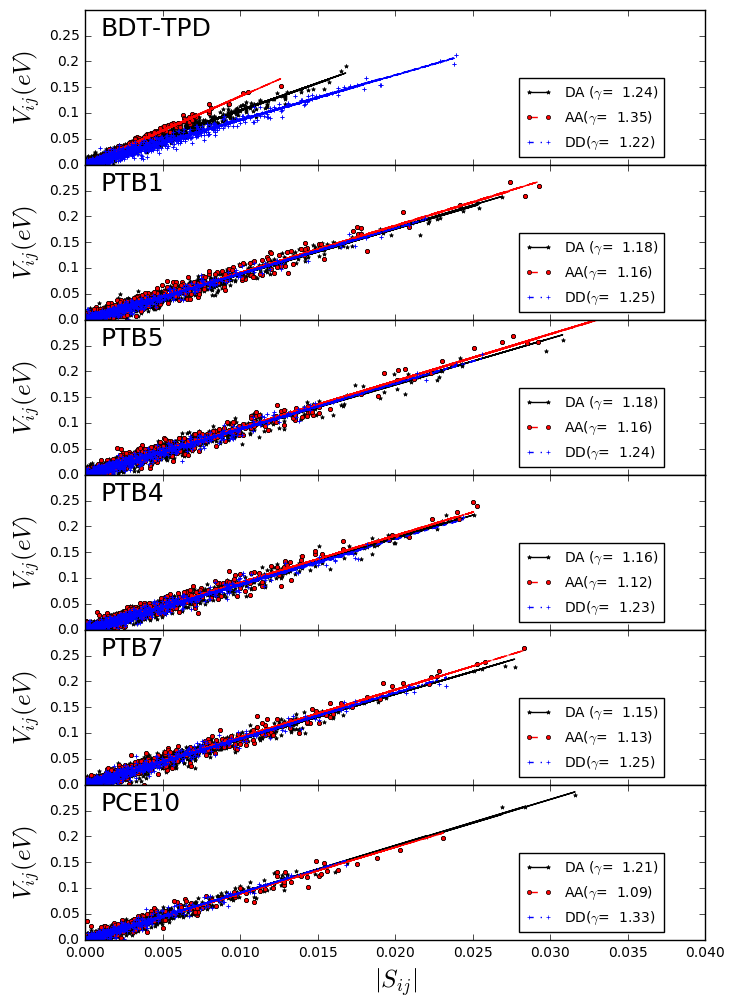

In [41]:
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 10
fontsz_text = 18


fig,ax = plt.subplots(6,sharex=True)
#fig,ax = plt.subplots(6)

ax[5].set_xlabel(r'$|S_{ij}|$',fontsize=fontsz_text)
    
i = 0     
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i

    print calc_i.tag
    name_i = str(calc_i.properties['name'])  
    print name_i

    ax[i].set_ylabel(r'$V_{ij}(eV)$',fontsize=fontsz_text)


    absSij_DA = calc_i.et_DA['absSij'].values

    n_zeros = np.zeros(len(absSij_DA))

    Ei_DA = calc_i.et_DA['HOMO_i'].values #apply(lambda x: np.log10(x)) #values
    Ej_DA = calc_i.et_DA['HOMO_j'].values #apply(lambda x: np.log10(x)) #values
    Vij_DA = calc_i.et_DA['Vij'].values #apply(lambda x: np.log10(x)) #values

    ax[i].plot(absSij_DA,Vij_DA,'*k',ms=ms)
    f_x = calc_S_eiejV(calc_i.coef_DA, absSij_DA, Ei_DA, Ej_DA) 
    ax[i].plot(absSij_DA,f_x,'-k',ms=ms)
    ax[i].plot(n_zeros,n_zeros,'*-k',label=r'DA ($\gamma$=%6.2f)'%(calc_i.coef_DA[0]),ms=ms)

    absSij_AA = calc_i.et_AA['absSij'].values #apply(lambda x: np.log10(x)) #values    
    Ei_AA = calc_i.et_AA['HOMO_i'].values #apply(lambda x: np.log10(x)) #values
    Ej_AA = calc_i.et_AA['HOMO_j'].values #apply(lambda x: np.log10(x)) #values
    Vij_AA = calc_i.et_AA['Vij'].values #apply(lambda x: np.log10(x)) #values
    ax[i].plot(absSij_AA,Vij_AA,'or',ms=ms)
    f_x = calc_S_eiejV(calc_i.coef_AA, absSij_AA, Ei_AA, Ej_AA) 
    ax[i].plot(absSij_AA,f_x,'--r',ms=ms)
    ax[i].plot(n_zeros,n_zeros,'o--r',label=r'AA($\gamma$=%6.2f)'%(calc_i.coef_AA[0]),ms=ms)



    absSij_DD = calc_i.et_DD['absSij'].values #apply(lambda x: np.log10(x)) #values
    Ei_DD = calc_i.et_DD['HOMO_i'].values #apply(lambda x: np.log10(x)) #values
    Ej_DD = calc_i.et_DD['HOMO_j'].values #apply(lambda x: np.log10(x)) #values
    Vij_DD = calc_i.et_DD['Vij'].values #apply(lambda x: np.log10(x)) #values
    ax[i].plot(absSij_DD,Vij_DD,'+b',ms=ms)
    f_x = calc_S_eiejV(calc_i.coef_DD, absSij_DD, Ei_DD, Ej_DD) 
    ax[i].plot(absSij_DD,f_x,'-.b',ms=ms)
    ax[i].plot(n_zeros,n_zeros,'+-.b',label=r'DD($\gamma$=%6.2f)'%(calc_i.coef_DD[0]),ms=ms)



    ax[i].set_xlim(0,0.040)
    ax[i].set_ylim(0.0,0.30)
    ax[i].text(0.001,0.25,name_i,fontsize=fontsz_text)


    ax[i].legend(loc=(0.7,0.05),prop={'size':fontsz_leg})



    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    


    i += 1 



fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)



fig.savefig('SijEiEjVij_v6.pdf',format='pdf')

In [42]:
print proj_i.coef_DDAA

[ 1.16762329]


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD
BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1
PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5
PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4
PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7
PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10
PCE10


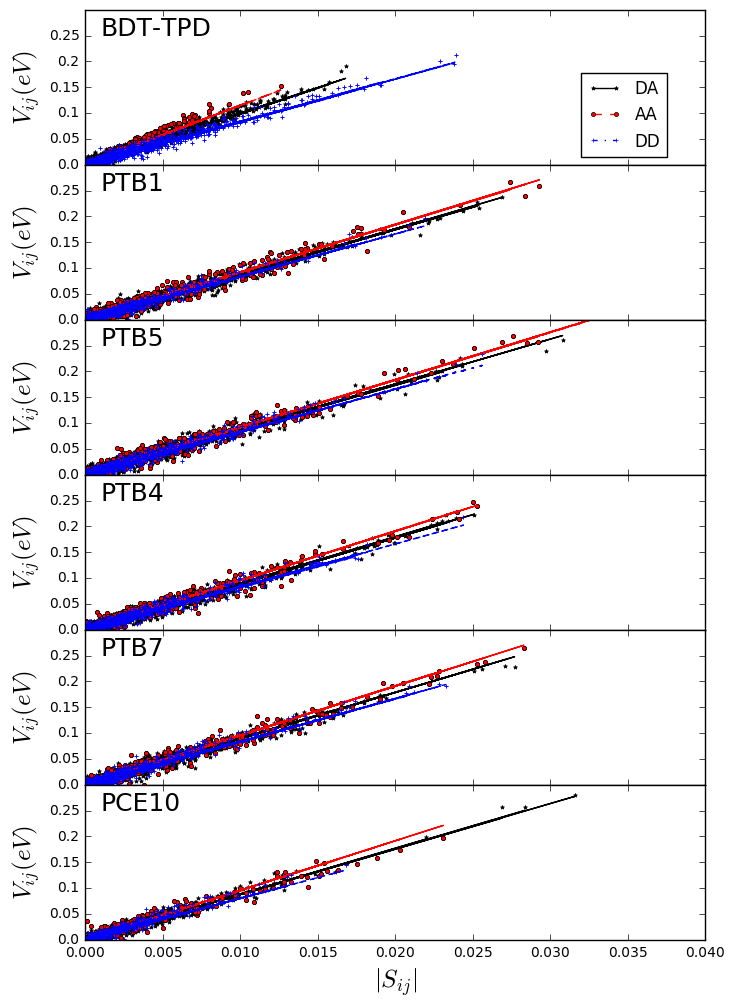

In [46]:
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 12
fontsz_text = 18


gamma_i = [1.17] #proj_i.coef_DDAA


fig,ax = plt.subplots(6,sharex=True)
    
i = 0     
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i

    name_i = str(calc_i.properties['name'])  
    print name_i

    ax[i].set_ylabel(r'$V_{ij}(eV)$',fontsize=fontsz_text)
    absSij_DA = calc_i.et_DA['absSij'].values

    n_zeros = np.zeros(len(absSij_DA))

    Ei_DA = calc_i.et_DA['HOMO_i'].values #apply(lambda x: np.log10(x)) #values
    Ej_DA = calc_i.et_DA['HOMO_j'].values #apply(lambda x: np.log10(x)) #values
    Vij_DA = calc_i.et_DA['Vij'].values #apply(lambda x: np.log10(x)) #values

    ax[i].plot(absSij_DA,Vij_DA,'*k',ms=ms)
    f_x = calc_S_eiejV(gamma_i, absSij_DA, Ei_DA, Ej_DA) 
    ax[i].plot(absSij_DA,f_x,'-k',ms=ms)
    #ax[i].plot(n_zeros,n_zeros,'*-k',label=r'DA ($\gamma$=%6.2f)'%(gamma_i[0]),ms=ms)
    ax[i].plot(n_zeros,n_zeros,'*-k',label=r'DA',ms=ms)

    absSij_AA = calc_i.et_AA['absSij'].values #apply(lambda x: np.log10(x)) #values    
    Ei_AA = calc_i.et_AA['HOMO_i'].values #apply(lambda x: np.log10(x)) #values
    Ej_AA = calc_i.et_AA['HOMO_j'].values #apply(lambda x: np.log10(x)) #values
    Vij_AA = calc_i.et_AA['Vij'].values #apply(lambda x: np.log10(x)) #values
    ax[i].plot(absSij_AA,Vij_AA,'or',ms=ms)
    f_x = calc_S_eiejV(gamma_i, absSij_AA, Ei_AA, Ej_AA) 
    ax[i].plot(absSij_AA,f_x,'--r',ms=ms)
    #ax[i].plot(n_zeros,n_zeros,'o--r',label=r'AA($\gamma$=%6.2f)'%(gamma_i[0]),ms=ms)
    ax[i].plot(n_zeros,n_zeros,'o--r',label=r'AA',ms=ms)

    absSij_DD = calc_i.et_DD['absSij'].values #apply(lambda x: np.log10(x)) #values
    Ei_DD = calc_i.et_DD['HOMO_i'].values #apply(lambda x: np.log10(x)) #values
    Ej_DD = calc_i.et_DD['HOMO_j'].values #apply(lambda x: np.log10(x)) #values
    Vij_DD = calc_i.et_DD['Vij'].values #apply(lambda x: np.log10(x)) #values
    ax[i].plot(absSij_DD,Vij_DD,'+b',ms=ms)
    f_x = calc_S_eiejV(gamma_i, absSij_DD, Ei_DD, Ej_DD) 
    ax[i].plot(absSij_DD,f_x,'-.b',ms=ms)
    #ax[i].plot(n_zeros,n_zeros,'+-.b',label=r'DD'($\gamma$=%6.2f)'%(gamma_i[0])',ms=ms)
    ax[i].plot(n_zeros,n_zeros,'+-.b',label=r'DD',ms=ms)

    ax[i].set_xlim(0,0.040)
    ax[i].set_ylim(0.0,0.30)
    ax[i].text(0.001,0.25,name_i,fontsize=fontsz_text)

    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    

    i += 1 

ax[i-1].set_xlabel(r'$|S_{ij}|$',fontsize=fontsz_text)
    
fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)
        
ax[0].legend(loc=(0.8,0.05),prop={'size':fontsz_leg})

fig.savefig('SijEiEjVij_v7.pdf',format='pdf')
#fig.savefig('SijEiEjVij_v5.pdf',bbox_inches='tight',pad_inches=5.5,format='pdf')

In [47]:
def find_gMax(Sij_df):
    #
    gSV_max = {}
    gSV_max['g_i'] = []
    gSV_max['S_max'] = []
    gSV_max['V_max'] = []
    #
    for g_i in  Sij_df['g_i'].unique():
        Sij_max = Sij_df[ Sij_df['g_i'] == g_i ]['absSij'].max()
        Vij_max = Sij_df[ Sij_df['g_i'] == g_i ]['Vij'].max()
        #
        gSV_max['g_i'].append(g_i)
        gSV_max['S_max'].append(Sij_max)
        gSV_max['V_max'].append(Vij_max)
    #
    return pd.DataFrame(gSV_max)

In [48]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    #if( calc_i.meta['status'] == 'processed' ):
    print calc_i.tag
    name_i = str(calc_i.properties['name'])  
    print name_i
    calc_i.DAgSV_max = find_gMax(calc_i.et_DA)
    calc_i.DDgSV_max = find_gMax(calc_i.et_DD)
    calc_i.AAgSV_max = find_gMax(calc_i.et_AA)        

D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB5
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3
PCE10
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2
BDT-TPD
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2
PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3
PTB7
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2
PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4
PCE10
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2
PCE10


In [49]:
table_lines = ''
for tag_i,calc_i in proj_i.calculations.iteritems():
    name_i = str(calc_i.properties['name'])  
    print name_i
    table_lines += '%s '%(calc_i.tag)
    table_lines += '& %8.4f & %8.2e '%(calc_i.DDgSV_max['S_max'].mean(),calc_i.DDgSV_max['S_max'].std())
    table_lines += '& %8.4f & %8.2e '%(calc_i.AAgSV_max['S_max'].mean(),calc_i.AAgSV_max['S_max'].std())
    table_lines += '& %8.4f & %8.2e '%(calc_i.DAgSV_max['S_max'].mean(),calc_i.DAgSV_max['S_max'].std())
    table_lines += '\\\\ \n'


print table_lines

PTB7
PTB4
PTB5
PCE10
BDT-TPD
PTB4
PTB7
PTB1
PCE10
PCE10
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2 &   0.0035 & 3.93e-03 &   0.0037 & 5.13e-03 &   0.0037 & 4.19e-03 \\ 
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 &   0.0039 & 3.79e-03 &   0.0031 & 4.50e-03 &   0.0037 & 4.36e-03 \\ 
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 &   0.0041 & 4.07e-03 &   0.0041 & 5.87e-03 &   0.0038 & 4.41e-03 \\ 
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3 &   0.0010 & 1.09e-03 &   0.0022 & 3.82e-03 &   0.0016 & 2.19e-03 \\ 
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 &   0.0047 & 4.19e-03 &   0.0017 & 2.04e-03 &   0.0030 & 3.12e-03 \\ 
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 &   0.0038 & 3.81e-03 &   0.0031 & 4.52e-03 &   0.0037 & 4.34e-03 \\ 
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_pro

In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')
table_lines = 'Polymer & $<DD>$ & $\sigma(DD)$  & $<AA>$ & $\sigma(AA)$  & $<DA>$ & $\sigma(DD)$  \\\\ \hline \n'
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i
    name_i = str(calc_i.properties['name'])  
    print name_i
    table_lines += '%s '%(name_i)
    table_lines += '& %8.4f & %8.2e '%(calc_i.DDgSV_max['S_max'].mean(),calc_i.DDgSV_max['S_max'].std())
    table_lines += '& %8.4f & %8.2e '%(calc_i.AAgSV_max['S_max'].mean(),calc_i.AAgSV_max['S_max'].std())
    table_lines += '& %8.4f & %8.2e '%(calc_i.DAgSV_max['S_max'].mean(),calc_i.DAgSV_max['S_max'].std())
    table_lines += '\\\\ \n'

print table_lines
f = open('unitSij_max.tex','w')
f.write(table_lines)
f.close()    
    

In [50]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables/')

table_lines = 'Polymer & <DD> & $\sigma(DD)$  & <AA> & $\sigma(AA)$  & <DA> & $\sigma(DD)$  \\\\ \hline \n'
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i
    name_i = str(calc_i.properties['name'])  
    print name_i
    table_lines += '%s '%(name_i)
    table_lines += '& %8.4e & %8.4e '%(calc_i.DDgSV_max['V_max'].mean(),calc_i.DDgSV_max['V_max'].std())
    table_lines += '& %8.4e & %8.4e '%(calc_i.AAgSV_max['V_max'].mean(),calc_i.AAgSV_max['V_max'].std())
    table_lines += '& %8.4e & %8.4e '%(calc_i.DAgSV_max['V_max'].mean(),calc_i.DAgSV_max['V_max'].std())
    table_lines += '\\\\ \n'


print table_lines
f = open('unitVij_max.tex','w')
f.write(table_lines)
f.close()    


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD
BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1
PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5
PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4
PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7
PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10
PCE10
Polymer & <DD> & $\sigma(DD)$  & <AA> & $\sigma(AA)$  & <DA> & $\sigma(DD)$  \\ \hline 
BDT-TPD & 4.1234e-02 & 3.6199e-02 & 2.3729e-02 & 2.7081e-02 & 3.3282e-02 & 3.2487e-02 \\ 
PTB1 & 3.2087e-02 & 3.1415e-02 & 3.6997e-02 & 4.6149e-02 & 3.6184e-02 & 3.9391e-02 \\ 
PTB5 & 3.6845e-02 & 3.6287e-02 & 3.9478e-02 & 5.2928e-02 & 3.5461e-02 & 3.8365e-02 \\ 
PTB4 & 3.4342e-02 & 3.3010e-02 & 3.1009e-02 & 4.1838e-02 & 3.4588e-02 & 3.8381e-02 \\ 
PTB7 & 3.2040e-02

In [51]:
from streamm import values as vals

In [52]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures/')



D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD
BDT-TPD 0.00465555364467
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1
PTB1 0.003553625
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5
PTB5 0.00407310159917
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4
PTB4 0.00386049390219
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB7
PTB7 0.00354583191268
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4 PCE10
PCE10 0.0021285909209
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41

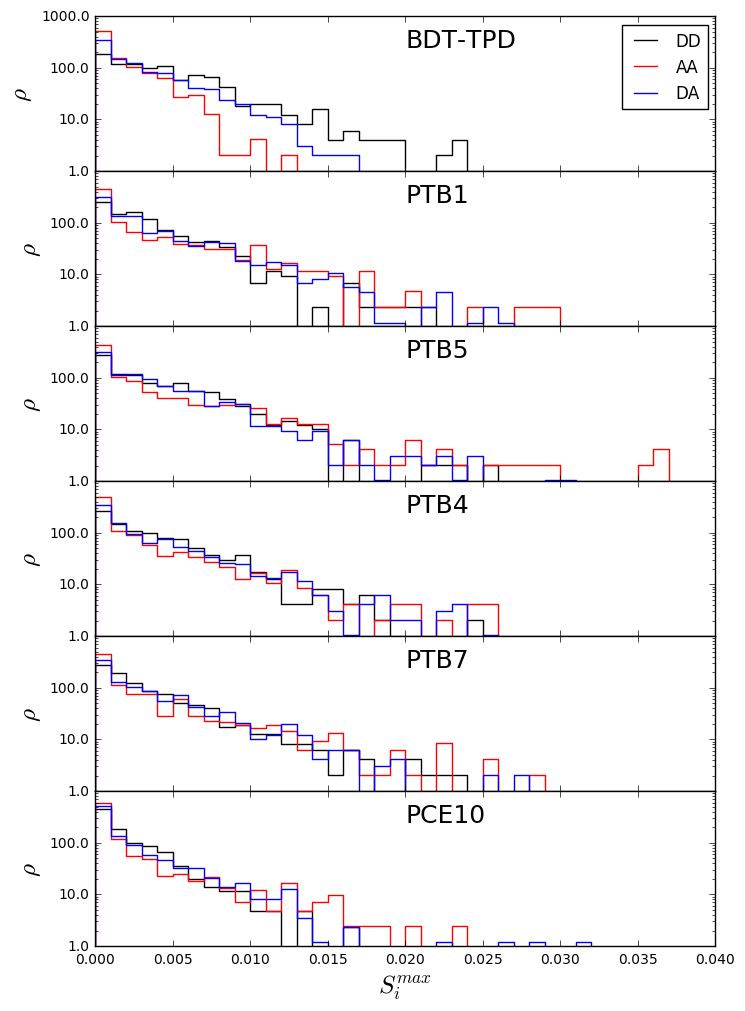

In [54]:
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 12
fontsz_text = 18

fig, ax = plt.subplots(6,sharex=True)

i = 0 
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i

    Polymer = calc_i.properties['name']
    mean = calc_i.DDgSV_max['S_max'].mean()
    # 
    print Polymer,mean
    # mol_SIJ['SIJ_max'].hist(ax=ax[i], bins=50, bottom=0.1)
    # ax.set_yscale('log')    
    #
    val_i = vals.Values('Sij_max',calc_i.DDgSV_max['S_max'].values)
    #val_i = values.Values('cosine',dih_df['cosine'].apply(lambda x: np.rad2deg(np.arccos(abs(x)))))
    val_i.calc_stats()
    val_i.set_bins(.001)
    val_i.calc_hist()
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps",label='DD')
    #
    val_i = vals.Values('Sij_max',calc_i.AAgSV_max['S_max'].values)
    #val_i = values.Values('cosine',dih_df['cosine'].apply(lambda x: np.rad2deg(np.arccos(abs(x)))))
    val_i.calc_stats()
    val_i.set_bins(.001)
    val_i.calc_hist()
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'r-.',ls = "steps",label='AA')
    #
    val_i = vals.Values('Sij_max',calc_i.DAgSV_max['S_max'].values)
    #val_i = values.Values('cosine',dih_df['cosine'].apply(lambda x: np.rad2deg(np.arccos(abs(x)))))
    val_i.calc_stats()
    val_i.set_bins(.001)
    val_i.calc_hist()
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'b:',ls = "steps",label='DA')
    #
    ax[i].set_xlim(0,0.04)
    ax[i].set_ylim(1.0,1000.0)
    ax[i].text(0.02,250.0,Polymer,fontsize=fontsz_text)
    #
    ax[i].set_yscale("log", nonposy='clip')
    ax[i].set_ylabel(r'$\rho$',fontsize=fontsz_text)    
    i += 1
    
    
i = 0 
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i
        
    labels=ax[i].get_yticks().tolist()
    if( i > 0 ):
        labels[-1]=''
        labels[-2]=''

    ax[i].set_yticklabels(labels)
    i += 1 
        
ax[i-1].set_xlabel(r'$S_{i}^{max}$',fontsize=fontsz_text)

fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

ax[0].legend(loc=(0.85,0.4),prop={'size':fontsz_leg})
fig.savefig('unitSijmax_v2.pdf',format='pdf')

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'processed' ):
        print calc_i.tag
        print calc_i.properties['name']

        A = np_Sijdf(calc_i.et_DA)
        D = np_sum_Vij(A)
        L = np_L(A,D)    
        Lplus = np.linalg.pinv(L)
        Omega = np_Omega(Lplus)
        Alpha = np_Alpha(Omega)
        calc_i.properties['KT_DA'] = np_KT(Alpha)        
        del A,D,L,Lplus,Omega,Alpha
        
        A = np_Sijdf(calc_i.et_DD)
        D = np_sum_Vij(A)
        L = np_L(A,D)    
        Lplus = np.linalg.pinv(L)
        Omega = np_Omega(Lplus)
        Alpha = np_Alpha(Omega)
        calc_i.properties['KT_DD'] = np_KT(Alpha)
        del A,D,L,Lplus,Omega,Alpha



        A = np_Sijdf(calc_i.et_AA)
        D = np_sum_Vij(A)
        L = np_L(A,D)    
        Lplus = np.linalg.pinv(L)
        Omega = np_Omega(Lplus)
        Alpha = np_Alpha(Omega)
        calc_i.properties['KT_AA'] = np_KT(Alpha)
        del A,D,L,Lplus,Omega,Alpha


calc_i.et_ij_s


In [ ]:
calc_i = proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2']

In [ ]:
print calc_i.et_DA.columns

In [ ]:
    A = np_Sijdf(calc_i.et_DA)

In [ ]:
    A = np_Sijdf(calc_i.et_DA)
    D = np_sum_Vij(A)
    L = np_L(A,D)    
    Lplus = np.linalg.pinv(L)
    Omega = np_Omega(Lplus)
    Alpha = np_Alpha(Omega)
    calc_i.properties['KT'] = np_KT(Alpha)

In [ ]:
    vmd_tcl = 'color Display Background white \n' 
    vmd_tcl += 'color Name C gray \n'
    vmd_tcl += 'display projection Orthographic \n'
    vmd_tcl += 'axes location Off \n'  
    vmd_tcl += 'display depthcue off \n'  
    mol_cnt = 0 
    for resij_tag,et_s0 in res_selc.iteritems():
        print resij_tag
        et_s1 = et_s0.sort_values('absSij')
        ettags = et_s1['tag'][-5:].values
        for i in range(5):
            ettag_i = ettags[i]
            vmd_tcl += "mol new {%s/%s.xyz} type {xyz} first 0 last -1 step 1 waitfor 1 \n"%(calc_i.dir['data'],ettag_i)
            vmd_tcl += "mol modstyle 0 %d CPK 1.000000 0.300000 12.000000 12.000000 \n"%(mol_cnt)
            mol_cnt += 1
        
    vmd_tcl += "mol off all"    
    mol_cnt = 0 
    for resij_tag,et_s0 in res_selc.iteritems():
        print resij_tag
        et_s1 = et_s0.sort_values('absSij')
        ettags = et_s1['tag'][-5:].values
        for i in range(5):
            ettag_i = ettags[i]
            vmd_tcl += "mol top %d \n"%(mol_cnt)
            vmd_tcl += "mol on %d \n"%(mol_cnt)
            vmd_tcl += "display resetview \n"
            vmd_tcl +=  "render snapshot %s_%sv1.tga \n"%(resij_tag,ettag_i)
            vmd_tcl += "mol off %d \n"%(mol_cnt)
            mol_cnt += 1

    print "/Applications/VMD\ 1.9.3.app/Contents/vmd/vmd_MACOSXX86 "
    print ""
    print vmd_tcl

In [ ]:
def find_DA(prod1_strucC):
    

    prod1_strucC.propcompile_particles()
    part_df =  pd.DataFrame(prod1_strucC.prop_particles)

    ress = []
    
    for res_i in  part_df['resname']:
        if( res_i not in ress ):
            ress.append(res_i)
        
            print res_i

    res_D = None
    res_A = None

    for res_i in ress:
        if( res_i[:1] == 'D' ):
            res_D = res_i
        if( res_i[:1] == 'A' ):
            res_A = res_i
    if( res_D == None or res_A == None ):
        print " Search failed"
        return 
    sel_D = part_df['resname'] == res_D
    sel_A = part_df['resname'] == res_A
    sel_R2 = part_df['resname'] == 'R2'
    sel_R3 = part_df['resname'] == 'R3'
    sel_R4 = part_df['resname'] == 'R4'
    sel_THIO = part_df['resname'] == 'THIO'



    syC = part_df['symbol'] == 'C'
    syS = part_df['symbol'] == 'S'
    syN = part_df['symbol'] == 'N'
    syO = part_df['symbol'] == 'O'    
    syH = part_df['symbol'] == 'H'    

    
    sub_DA = part_df[ (syC | syS  |syN | syO | syH ) &  (sel_D | sel_A | sel_R2 | sel_R3 | sel_R4 | sel_THIO ) ]
    prod1_strucC.write_xyz_list(sub_DA.index,'sub_DA.xyz') 
    
    return sub_DA
    
    

In [ ]:
def readstruc(calc_i):    
    calc_i.strucC.read_cply()
    
    sub_DA = find_DA(calc_i.strucC)
    
    struc_o = calc_i.strucC

    struc_o.bonded_nblist.build_nblist(struc_o.particles,struc_o.bonds )

    group_i_id = 'mol'
    struc_o.group_prop(group_i_id,group_i_id)

    groupset_mol = struc_o.groupsets[group_i_id]
    groupset_mol.calc_cent_mass()
    groupset_mol.calc_radius()
    groupset_mol.group_pbcs()
    

    struc_o.write_xyz('%s_pbcs.xyz'%(group_i_id))
    

    # DA_file = struc_o.write_list(sub_DA.index,'DA')
    group_id = 'residue'

    struc_o.group_prop(group_id,group_id,particles_select=sub_DA.index)
    groupset_i = struc_o.groupsets[group_id]
    groupset_i.calc_cent_mass()
    groupset_i.calc_radius()
    

In [ ]:
    os.chdir(calc_i.dir['data'])
    bash = 'scp tkemper@peregrine.nrel.gov:%s/%s.cply ./'%(calc_i.dir['scratch'],calc_i.tag)
    print bash
    calc_i.strucC.tag = calc_i.tag

In [ ]:
    group_id = 'residue'
    groupset_i = struc_o.groupsets[group_id]


In [ ]:
    vmd_tcl = 'color Display Background white \n' 
    vmd_tcl += 'color Name C gray \n'
    vmd_tcl += 'display projection Orthographic \n'
    vmd_tcl += 'axes location Off \n'

In [ ]:
    vmd_tcl += "mol new {%s/%s.xyz} type {xyz} first 0 last -1 step 1 waitfor 1 \n"%(calc_i.dir['data'],'mol_pbcs')

In [ ]:
    mol_cnt = 0

In [ ]:
    et_s1 = calc_i.et_DD.sort_values('absSij')
    g_is = et_s1['g_i'][-5:].values
    g_js = et_s1['g_j'][-5:].values    

In [ ]:
    for i in range(5):
        g_i = g_is[i]
        g_j = g_js[i]

        group_i = groupset_i.groups[g_i]
        group_j = groupset_i.groups[g_j]

        group_i.write_xyz()
        group_j.write_xyz()
    
        mol_cnt += 1
        vmd_tcl += "mol new {%s/%s.xyz} type {xyz} first 0 last -1 step 1 waitfor 1 \n"%(calc_i.dir['data'],group_i.tag)
        vmd_tcl += "mol modstyle 0 %d CPK 1.000000 0.300000 12.000000 12.000000 \n"%(mol_cnt)
        mol_cnt += 1
        vmd_tcl += "mol new {%s/%s.xyz} type {xyz} first 0 last -1 step 1 waitfor 1 \n"%(calc_i.dir['data'],group_j.tag)
        vmd_tcl += "mol modstyle 0 %d CPK 1.000000 0.300000 12.000000 12.000000 \n"%(mol_cnt)

In [ ]:
    print vmd_tcl

In [ ]:
    print "render snapshot DD_%d_%d_et1v4.tga"%(g_i,g_j)

In [ ]:
    mol off 0

In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers')

In [ ]:
proj_i.dump_json()
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.dump_json()

